In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

In [2]:
crypto = pd.read_csv('/home/lin/教材/Financial_data/data/cryptocurrency/allcrypto.csv')
crypto['Date']=pd.to_datetime(crypto['Date'])
crypto.set_index('Date', inplace = True)
crypto.sort_index(inplace=True)
logRC = np.log(crypto).diff()
logRC.drop(logRC.index[0], inplace = True)
print(logRC.head())

             Bitcoin  Ethereum  Ripple  NEM  Litecoin  Stellar  Dash  Monero  \
Date                                                                           
2013-04-29  0.074151       NaN     NaN  NaN  0.006873      NaN   NaN     NaN   
2013-04-30 -0.039082       NaN     NaN  NaN -0.018434      NaN   NaN     NaN   
2013-05-01 -0.172385       NaN     NaN  NaN -0.123614      NaN   NaN     NaN   
2013-05-02 -0.106130       NaN     NaN  NaN -0.120088      NaN   NaN     NaN   
2013-05-03 -0.073545       NaN     NaN  NaN -0.103055      NaN   NaN     NaN   

            Verge  Siacon  
Date                       
2013-04-29    NaN     NaN  
2013-04-30    NaN     NaN  
2013-05-01    NaN     NaN  
2013-05-02    NaN     NaN  
2013-05-03    NaN     NaN  


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [3]:
corrcoeff = logRC.corr()
corrcoeff

,Bitcoin,Ethereum,Ripple,NEM,Litecoin,Stellar,Dash,Monero,Verge,Siacon
Bitcoin,1.000000,0.246791,0.288469,0.280985,0.622738,0.242701,0.306448,0.349251,0.158341,0.227387
Ethereum,0.246791,1.000000,0.095576,0.161285,0.235999,0.145694,0.233510,0.248682,0.084792,0.240185
Ripple,0.288469,0.095576,1.000000,0.186777,0.282322,0.482722,0.063825,0.134306,0.031898,0.106327
NEM,0.280985,0.161285,0.186777,1.000000,0.272568,0.303746,0.219583,0.191524,0.133158,0.201133
Litecoin,0.622738,0.235999,0.282322,0.272568,1.000000,0.251638,0.245489,0.268140,0.088651,0.227692
Stellar,0.242701,0.145694,0.482722,0.303746,0.251638,1.000000,0.167049,0.238291,0.085257,0.233075
Dash,0.306448,0.233510,0.063825,0.219583,0.245489,0.167049,1.000000,0.294270,0.125528,0.222193
Monero,0.349251,0.248682,0.134306,0.191524,0.268140,0.238291,0.294270,1.000000,0.128108,0.203170
Verge,0.158341,0.084792,0.031898,0.133158,0.088651,0.085257,0.125528,0.128108,1.000000,0.125996
Siacon,0.227387,0.240185,0.106327,0.201133,0.227692,0.233075,0.222193,0.203170,0.125996,1.000000


In [4]:
KenTau = logRC.corr(method='kendall')
KenTau

,Bitcoin,Ethereum,Ripple,NEM,Litecoin,Stellar,Dash,Monero,Verge,Siacon
Bitcoin,1.000000,0.138365,0.205084,0.196229,0.481015,0.183753,0.236141,0.234466,0.140847,0.155693
Ethereum,0.138365,1.000000,0.137676,0.157114,0.164996,0.168159,0.206648,0.251549,0.076452,0.163056
Ripple,0.205084,0.137676,1.000000,0.189832,0.226169,0.280196,0.133936,0.127994,0.047069,0.148792
NEM,0.196229,0.157114,0.189832,1.000000,0.186767,0.212122,0.176561,0.166242,0.115050,0.187714
Litecoin,0.481015,0.164996,0.226169,0.186767,1.000000,0.218626,0.210588,0.200928,0.089965,0.170461
Stellar,0.183753,0.168159,0.280196,0.212122,0.218626,1.000000,0.167313,0.201713,0.058172,0.206088
Dash,0.236141,0.206648,0.133936,0.176561,0.210588,0.167313,1.000000,0.214226,0.069479,0.197804
Monero,0.234466,0.251549,0.127994,0.166242,0.200928,0.201713,0.214226,1.000000,0.088762,0.183701
Verge,0.140847,0.076452,0.047069,0.115050,0.089965,0.058172,0.069479,0.088762,1.000000,0.105113
Siacon,0.155693,0.163056,0.148792,0.187714,0.170461,0.206088,0.197804,0.183701,0.105113,1.000000


In [5]:
spearmanRank = logRC.corr(method='spearman')
spearmanRank

,Bitcoin,Ethereum,Ripple,NEM,Litecoin,Stellar,Dash,Monero,Verge,Siacon
Bitcoin,1.000000,0.201581,0.289468,0.282278,0.630467,0.262337,0.336225,0.337308,0.199447,0.224872
Ethereum,0.201581,1.000000,0.200572,0.226362,0.238932,0.245524,0.293675,0.355942,0.110701,0.234744
Ripple,0.289468,0.200572,1.000000,0.271717,0.317510,0.394344,0.193283,0.186153,0.068554,0.216309
NEM,0.282278,0.226362,0.271717,1.000000,0.269423,0.305003,0.254383,0.241445,0.165191,0.270952
Litecoin,0.630467,0.238932,0.317510,0.269423,1.000000,0.310831,0.302701,0.291650,0.129961,0.246614
Stellar,0.262337,0.245524,0.394344,0.305003,0.310831,1.000000,0.242307,0.294452,0.085309,0.295592
Dash,0.336225,0.293675,0.193283,0.254383,0.302701,0.242307,1.000000,0.302627,0.100533,0.283663
Monero,0.337308,0.355942,0.186153,0.241445,0.291650,0.294452,0.302627,1.000000,0.128056,0.267834
Verge,0.199447,0.110701,0.068554,0.165191,0.129961,0.085309,0.100533,0.128056,1.000000,0.148116
Siacon,0.224872,0.234744,0.216309,0.270952,0.246614,0.295592,0.283663,0.267834,0.148116,1.000000


In [6]:
diff = pd.DataFrame(columns=['Difference between Pearson and Kendall', 'Difference between Pearson and Spearman'])
diffSP = abs(spearmanRank - np.arcsin(corrcoeff/2) * (6 / np.pi)) / corrcoeff
diff['Difference between Pearson and Spearman'] = diffSP.values.flatten()

[None, None]

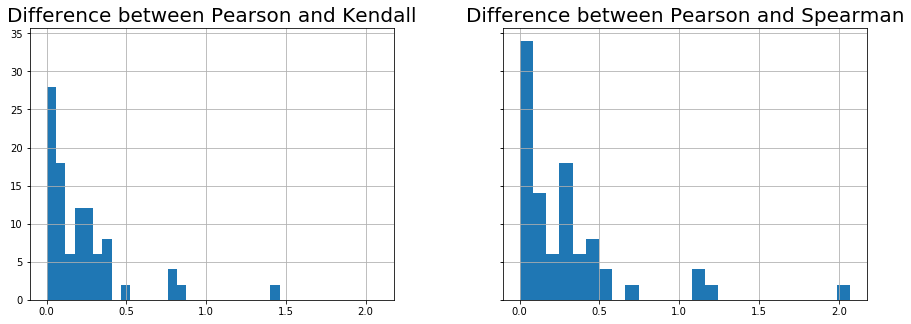

In [7]:
diffKtauP = abs(KenTau - np.arcsin(corrcoeff) * (2 / np.pi)) / corrcoeff
diff['Difference between Pearson and Kendall'] = diffKtauP.values.flatten()
fig = diff.hist(bins=25, figsize = (15, 5), sharex=True, sharey=True)
[x.title.set_size(20) for x in fig.ravel()]

In [8]:
#Here plotted the histogram of absolut values of difference between the two, nomalized by the Pearson corr coeff

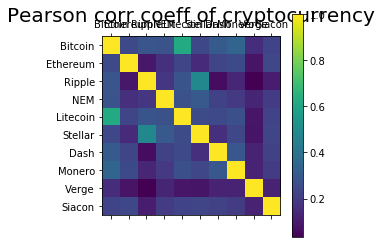

In [9]:
#%matplotlib tk
%matplotlib inline
plt.matshow(corrcoeff)
plt.xticks(range(len(logRC.columns)), logRC.columns)
plt.yticks(range(len(logRC.columns)), logRC.columns)
plt.title('Pearson corr coeff of cryptocurrency', fontsize=20)
plt.colorbar()

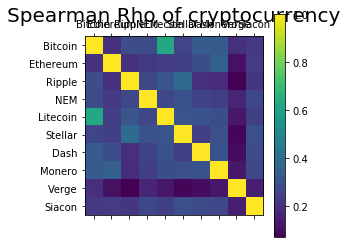

In [10]:
plt.matshow(spearmanRank)
plt.xticks(range(len(logRC.columns)), logRC.columns)
plt.yticks(range(len(logRC.columns)), logRC.columns)
plt.title('Spearman Rho of cryptocurrency', fontsize=20)
plt.colorbar()

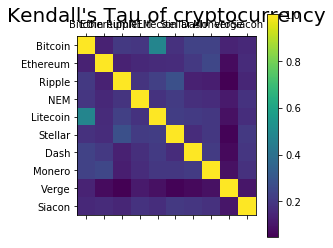

In [11]:
plt.matshow(KenTau)
plt.xticks(range(len(logRC.columns)), logRC.columns)
plt.yticks(range(len(logRC.columns)), logRC.columns)
plt.title('Kendall\'s Tau of cryptocurrency', fontsize=20)
plt.colorbar()

In [20]:
models_matrix=[[sm.ols(formula='ref_col ~ col', data=logRC) for col in logRC if col< ref_col] for ref_col in logRC]
models_matrix

PatsyError: Number of rows mismatch between data argument and ref_col (1716 versus 1)
    ref_col ~ col
    ^^^^^^^

In [20]:
res = sm.OLS(logRC['Ripple'], logRC['Bitcoin']).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ripple   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 08 Mar 2018   Prob (F-statistic):                nan
Time:                        14:33:55   Log-Likelihood:                    nan
No. Observations:                1716   AIC:                               nan
Df Residuals:                    1715   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bitcoin           nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
models_matrix=[print(sm.ols(formula=f'Ripple ~ {col}', data=logRC).fit().summary()) for col in logRC if col!= 'Ripple']
#models_matrix.summary()

                            OLS Regression Results                            
Dep. Variable:                 Ripple   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     146.7
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           2.22e-32
Time:                        14:06:57   Log-Likelihood:                 1861.9
No. Observations:                1618   AIC:                            -3720.
Df Residuals:                    1616   BIC:                            -3709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0021      0.002      1.107      0.2

In [ ]:
for ref_col in logRC:
    for col in logRC:
        #if col != ref_col:
        formu = f'{ref_col} ~ {col}'
        print(formu)
        model = sm.ols(formula=formu, data=logRC)
        res = model.fit()
        print(res.summary())

Bitcoin ~ Bitcoin
                            OLS Regression Results                            
Dep. Variable:                Bitcoin   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.110e+34
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:21:08   Log-Likelihood:                 64676.
No. Observations:                1716   AIC:                        -1.293e+05
Df Residuals:                    1714   BIC:                        -1.293e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.554e-18   2.51e-19  

In [23]:

formu = f'Ripple ~ {col}'
print(formu)
#formula="A ~ B + C", data=df
model = smf.ols(formula=formu, data=logRC)
res = model.fit()
print(res.summary())

Ripple ~ Siacon
                            OLS Regression Results                            
Dep. Variable:                 Ripple   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     9.868
Date:                Thu, 08 Mar 2018   Prob (F-statistic):            0.00174
Time:                        14:34:23   Log-Likelihood:                 959.98
No. Observations:                 865   AIC:                            -1916.
Df Residuals:                     863   BIC:                            -1906.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0060      0.003    

In [24]:
import itertools
lmstr = "+".join(x)
    m = smf.ols(formula = "sc ~ " + lmstr, data = aft_tmt)
    f = m.fit()

In [ ]:
itercols = logRC.columns.tolist()
for x in itertools.combinations(itercols, 1):
    print(x)
    lmstr = "+".join(x)
    print(lmstr)
    m = smf.ols(formula = "Ripple ~ " + lmstr, data = logRC)
    f = m.fit()
    print(f.summary())

('Bitcoin',)
Bitcoin
                            OLS Regression Results                            
Dep. Variable:                 Ripple   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     146.7
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           2.22e-32
Time:                        14:47:38   Log-Likelihood:                 1861.9
No. Observations:                1618   AIC:                            -3720.
Df Residuals:                    1616   BIC:                            -3709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0021      0.00